In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [2]:
#create empty dataframe
data = pd.DataFrame()

data["Gender"] = ["Male", "Male", "Female", "Female", "Female", "Male", "Male", "Female"]

data["Weight"] = [56,76,45,43,38,65,76,56]
data["Height"] = [5.4, 6.6, 4.9, 5.7, 6.1, 5.43, 5.98, 4.88]
data["Foot_Size"] = [12, 11, 7, 6, 8, 9, 10, 5]

In [3]:
data

,Gender,Weight,Height,Foot_Size
0,Male,56,5.40,12
1,Male,76,6.60,11
2,Female,45,4.90,7
3,Female,43,5.70,6
4,Female,38,6.10,8
5,Male,65,5.43,9
6,Male,76,5.98,10
7,Female,56,4.88,5


AxesSubplot(0.125,0.125;0.227941x0.755)


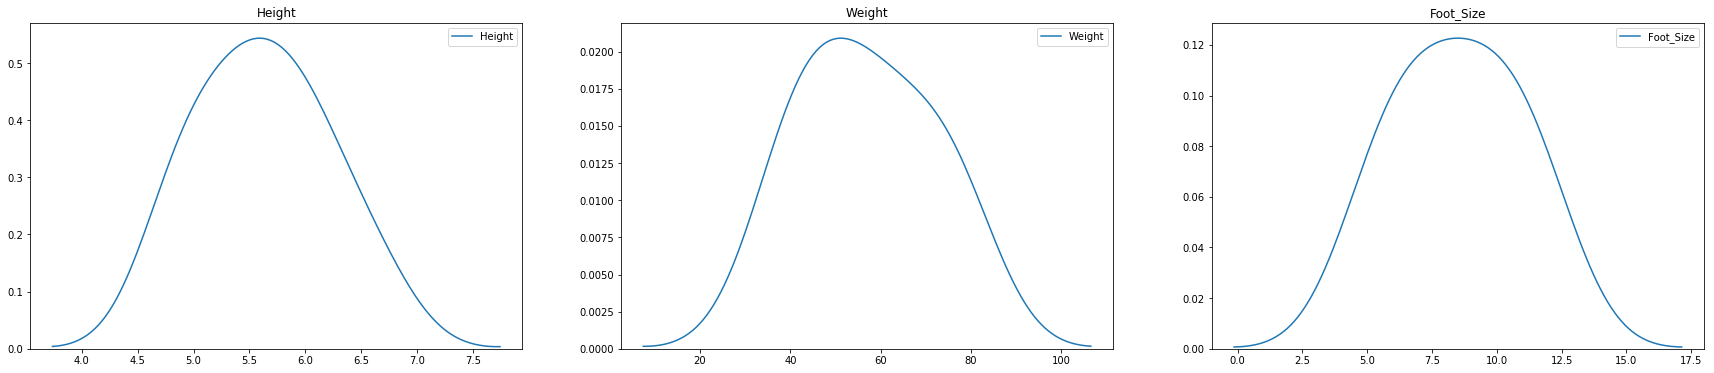

In [4]:
fig, ax = plt.subplots(figsize=(30,6), ncols=3, nrows=1)

print(ax[0])
ax[0].set_title("Height")
ax[1].set_title("Weight")
ax[2].set_title("Foot_Size")



sns.kdeplot(data=data['Height'], ax=ax[0])
sns.kdeplot(data['Weight'], ax=ax[1])
sns.kdeplot(data['Foot_Size'], ax=ax[2])

In [42]:
person = pd.DataFrame()

In [43]:
person["Height"] = [6]
person["Weight"] = [55]
person["Foot_Size"] = [7]

In [44]:
person

,Height,Weight,Foot_Size
0,6,55,7


# Calculate Priors

In [45]:
#calculate Prior

#Number of males
no_of_males = data["Gender"][data["Gender"]=="Male"].count()

#Numner of female
no_of_females = data["Gender"][data["Gender"]=="Female"].count()

#Number of total people
total_people = data["Gender"].count()

#Number of male divided by total people
p_male = no_of_males/total_people

#Number of female divided by total people
p_female = no_of_females/total_people



# Calculate Likelihood

p(height∣female)
=(1/(√2πvariance of female height in the data)) *(e^(−(observation’s height−average height of females in the data)2/2variance of female height in the data))


In [46]:
#Group the data by gender and calculate mean for each feature
data_means = data.groupby("Gender").mean()
data_means

,Weight,Height,Foot_Size
Gender,,,
Female,45.50,5.3950,6.5
Male,68.25,5.8525,10.5


In [47]:
#Group the data by gender and calculate variance for each feature
data_var = data.groupby("Gender").var()

In [48]:
data_var

,Weight,Height,Foot_Size
Gender,,,
Female,57.666667,0.366767,1.666667
Male,93.583333,0.319425,1.666667


In [49]:
data_var.index

Index(['Female', 'Male'], dtype='object', name='Gender')

In [50]:
#Means for male
mean_height_male = data_means['Height'][data_var.index=='Male'][0]
mean_weight_male = data_means['Weight'][data_var.index=='Male'][0]
mean_foot_size_male = data_means['Foot_Size'][data_var.index=='Male'][0]

#variance for male
var_height_male = data_var['Height'][data_var.index=='Male'][0]
var_weight_male = data_var['Weight'][data_var.index=='Male'][0]
var_foot_size_male = data_var['Foot_Size'][data_var.index=='Male'][0]

In [51]:
#Means for female
mean_height_female = data_means['Height'][data_var.index=='Female'][0]
mean_weight_female = data_means['Weight'][data_var.index=='Female'][0]
mean_foot_size_female = data_means['Foot_Size'][data_var.index=='Female'][0]

#Variance for female
var_height_female = data_var['Height'][data_var.index=='Female'][0]
var_weight_female = data_var['Weight'][data_var.index=='Female'][0]
var_foot_size_female = data_var['Foot_Size'][data_var.index=='Female'][0]

In [52]:
mean_height_male

5.8525

In [53]:
mean_height_female

5.3950000000000005

In [54]:
#Create a function that calculates p(x|y)
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p

In [55]:
# Numerator of the posterior if the unclassified observation is a male
posterior_for_male = p_male *\
                        p_x_given_y(person["Height"][0], mean_height_male, var_height_male)*\
                        p_x_given_y(person["Weight"][0], mean_weight_male, var_weight_male)*\
                        p_x_given_y(person["Foot_Size"][0], mean_foot_size_male, var_foot_size_male)

In [56]:
posterior_for_male

4.313216370306202e-05

In [57]:
# Numerator of the posterior if the unclassified observation is a male
posterior_for_female = p_female *\
                        p_x_given_y(person["Height"][0], mean_height_female, var_height_female)*\
                        p_x_given_y(person["Weight"][0], mean_weight_female, var_weight_female)*\
                        p_x_given_y(person["Foot_Size"][0], mean_foot_size_female, var_foot_size_female)

In [58]:

posterior_for_male>posterior_for_female

False